In [3]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
dado = pd.read_csv('market_analysis_news.csv')

NameError: name 'pd' is not defined

In [9]:
dado['TBPolarity'] = pd.Series(dtype='float')
dado['TBSubjectivity'] = pd.Series(dtype='float')

def textblob_pol(body):
    
    return TextBlob(body).sentiment.polarity

def textblob_sub(body):
    
    return TextBlob(body).sentiment.subjectivity

dado['TBPolarity'] = dado['Content'].apply(textblob_pol)

dado['TBSubjectivity'] = dado['Content'].apply(textblob_sub)

dado.to_pickle('noticias.pkl')

In [4]:
news = pd.read_pickle('noticias.pkl')

news['Date'] = pd.to_datetime(news['Date'])
news=news.loc[(news['Date']> '2018-12-31') & (news['Date']< '2020-08-19')]

news['weight'] = news['Views']/news.groupby('Date')['Views'].transform('sum')
news['value']=news['TBPolarity']*news['weight']

In [5]:
newsagg = news.set_index('Date').groupby(pd.Grouper(freq='D')).sum()
newsagg.reset_index(inplace=True)

In [6]:
preço_btc = pd.read_csv('btcusd.csv', skiprows=1).sort_values(by='Date')

preço2019 = preço_btc[(pd.to_datetime(preço_btc['Date']).dt.year >= 2019)]
preço2019['Date']=pd.to_datetime(preço2019['Date'])

C:\Users\dwsur\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
import numpy as np

In [8]:
def newscorr(dado1, dado2):                                          #função que avalia o melhor número de dias de lag
    dummy=0                                                         #através da correlação entre os dados extraídos e os dados do btc
    max = 0                                                         #dado 1 começa a partir da i+1-ésima, logo é o dado que queremos prever
    for i in range(15):
        if i == 7:
            print("Lag de maior correlação:", max, " dias atrás")
            return 
        k=i+1
        h=i-7
        if i==0:
            print("Correlação com notícias do dia anterior:", np.corrcoef(dado1[k:h].astype('float64'), dado2[:-8].astype('float64'))[0][1])
        else:
            print("Correlação com notícias de ", 1+i, " dias atrás:", np.corrcoef(dado1[k:h].astype('float64'), dado2[:-8].astype('float64'))[0][1])
        if np.corrcoef(dado1[k:h].astype('float64'), dado2[:-8].astype('float64'))[0][1]>dummy:
            dummy = np.corrcoef(dado1[k:h].astype('float64'), dado2[:-8].astype('float64'))[0][1]
            max=i+1

In [10]:
newsagg['dummy'] = ''

In [11]:
for i in range(587):
    if newsagg['value'][i] != 0:
        newsagg.loc[i, 'dummy'] = 0
    elif (newsagg['value'][i] == 0) & (newsagg['dummy'][i-1] == 0):
        newsagg.loc[i, 'dummy'] = 1
    elif (newsagg['value'][i] == 0) & (newsagg['dummy'][i-1] == 1):
        newsagg.loc[i, 'dummy'] = 2
    elif (newsagg['value'][i] == 0) & (newsagg['dummy'][i-1] == 2):
        newsagg.loc[i, 'dummy'] = 3
    elif (newsagg['value'][i] == 0) & (newsagg['dummy'][i-1] == 3):    
        newsagg.loc[i, 'dummy'] = 4
    elif (newsagg['value'][i] == 0) & (newsagg['dummy'][i-1] == 4):
        newsagg.loc[i, 'dummy'] = 5
    elif (newsagg['value'][i] == 0) & (newsagg['dummy'][i-1] == 5):
        newsagg.loc[i, 'dummy'] = 6
    elif (newsagg['value'][i] == 0) & (newsagg['dummy'][i-1] == 6):
        newsagg.loc[i, 'dummy'] = 7
    elif (newsagg['value'][i] == 0) & (newsagg['dummy'][i-1] == 7):
        newsagg.loc[i, 'dummy'] = 8
    elif (newsagg['value'][i] == 0) & (newsagg['dummy'][i-1] == 8):
        newsagg.loc[i, 'dummy'] = 9
    elif (newsagg['value'][i] == 0) & (newsagg['dummy'][i-1] == 9):
        newsagg.loc[i, 'dummy'] = 10
    elif (newsagg['value'][i] == 0) & (newsagg['dummy'][i-1] == 10):
        newsagg.loc[i, 'dummy'] = 11
    elif (newsagg['value'][i] == 0) & (newsagg['dummy'][i-1] == 11):
        newsagg.loc[i, 'dummy'] = 12
    elif (newsagg['value'][i] == 0) & (newsagg['dummy'][i-1] == 12):
        newsagg.loc[i, 'dummy'] = 13
    else:
        newsagg.loc[i, 'dummy'] = 'idk'

In [12]:
newsagg['value'] = newsagg['value'].replace(to_replace=0, method='ffill')*1/(1+newsagg['dummy'])

In [13]:
newsagg

,Date,Views,TBPolarity,TBSubjectivity,weight,value,dummy
0,2019-01-09,8905,0.038483,0.391305,1.0,0.0384833,0
1,2019-01-10,0,0.000000,0.000000,0.0,0.0192417,1
2,2019-01-11,6069,0.043374,0.343965,1.0,0.0433737,0
3,2019-01-12,16526,0.008485,0.340677,1.0,0.00848515,0
4,2019-01-13,20333,0.037433,0.339174,1.0,0.0374332,0
...,...,...,...,...,...,...,...
582,2020-08-13,0,0.000000,0.000000,0.0,0.00462468,5
583,2020-08-14,0,0.000000,0.000000,0.0,0.00396401,6
584,2020-08-15,16768,0.139195,0.452787,1.0,0.139195,0
585,2020-08-16,21790,0.120838,0.446944,1.0,0.120838,0


In [15]:
def melhorMA(btc, dado):
    max=0
    value=0
    for i in range(30):
        lagged =  dado.rolling(window=i+1).mean().dropna()
        if np.corrcoef(btc[i:].astype('float64'), lagged.astype('float64'))[0][1]>value:
            value = np.corrcoef(btc[i:].astype('float64'), lagged.astype('float64'))[0][1]
            max=i+1
    print(max, value)
    return

In [16]:
corr = pd.merge(left=preço2019, left_on='Date',
         right=newsagg, right_on='Date')

In [17]:
melhorMA(corr['Close'], corr['value'])

18 0.2769079779861431


In [18]:
medias = pd.DataFrame()

medias['MA18']=corr['value'].rolling(window=18).mean().dropna()
medias['MA4'] = corr.loc[17:, 'value'].rolling(window=1).mean().dropna()

medias = medias.set_index(corr.loc[17:, 'Date'])

medias['posição'] = medias['MA4'] > medias['MA18']
medias['anterior'] =  medias['posição'].shift(1)

medias.dropna(inplace=True)

medias['mudança'] = np.where(medias['posição'] == medias['anterior'], False, True)

medias = medias.reset_index()

medias['venda'] = np.where((medias['posição'] == False) & (medias['mudança'] == True), True, False)
medias['compra'] = np.where((medias['posição'] == True) & (medias['mudança'] == True), True, False)

In [46]:
def lucro(preços, decisao):
    inicio = True
    btc = 0
    primeiro = False
    caixa = 0
    investimento = 0
    valor = []
    for i in range(np.shape(preços)[0]):
        if (inicio == True) & (decisao.loc[i, 'compra'] == True):
            inicio = False
            btc = 1
            primeiro = True
            investimento = preços.loc[i+19, 'Open']
        elif (inicio == False) & (decisao.loc[i, 'venda'] == True) & (primeiro == True):
            btc = 0
            primeiro = False
            caixa = preços.loc[i+19, 'Close']
        elif (inicio == False) & (decisao.loc[i, 'compra'] == True) & (primeiro == False):
            btc = caixa/preços.loc[i+19, 'Open']
            caixa = 0
        elif (inicio == False) & (decisao.loc[i, 'venda'] == True) & (primeiro == False):
            caixa = btc*preços.loc[i+19, 'Close']
            btc = 0
        valor.append(max(caixa, btc*preços.loc[i+18, 'Close']))
    if caixa == 0:
        caixa = btc*preços.loc[i+18, 'Close']
        valor.append(max(caixa, btc*preços.loc[i+18, 'Close']))
    return valor, 100*(caixa-investimento)/investimento, pd.Series(valor).var()

In [50]:
lucro(corr[18:], medias)[2]

1946058.8999363855

In [51]:
corr.loc[18:, 'Close'].var()

4807015.078184805

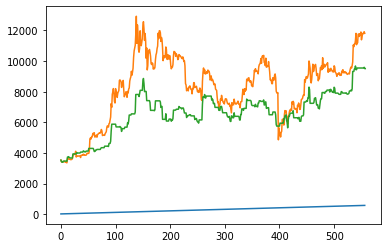

In [41]:
plt.plot(corr.loc[18:, 'Close'].reset_index())
plt.plot(lucro(corr[18:], medias))